# Szükséges telepítések

In [1]:
pip install imgaug==0.2.5
pip install git+https://github.com/astropy/photutils.git
pip install eleanor

     |████████████████████████████████| 563kB 4.9MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp36-none-any.whl size=561439 sha256=14f846801b03ada96f9970e81072234036464823dc98c9fffaf88a8f269eacb2
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


# Csomagok importálása

In [0]:
import eleanor
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Egyetlen szektor fotometrálása

In [2]:
star = eleanor.Source(tic=38846515, sector=6, tc=True)

/usr/local/lib/python3.6/dist-packages/eleanor/source.py:396: UserWarning: Warning: unable to create .. Downloading TessCut to the current working directory instead.
  'working directory instead.'.format(download_dir))


Inflating...


In [0]:
data = eleanor.TargetData(star, height=13, width=13, bkg_size=31, do_psf=False, do_pca=False)

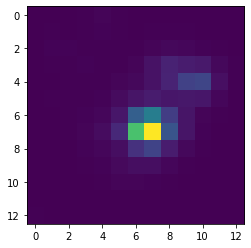

In [4]:
plt.imshow(data.tpf[0])
plt.show()

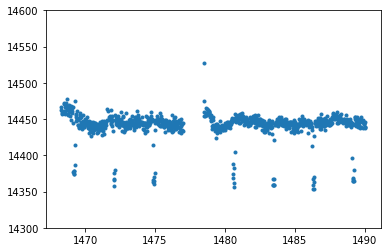

In [7]:
q = data.quality == 0
plt.plot(data.time[q], data.corr_flux[q], '.')
#plt.ylim(14300,14600)
plt.show()

In [0]:
np.savetxt('lc.txt', np.c_[data.time[q], data.corr_flux[q], data.flux_err[q]] )

# Összzes szektor fotometrálása egyetlen csillagra

In [8]:
star = eleanor.multi_sectors(tic=307210830, sectors='all', tc=True)

Found star in Sector(s) 2 5 8 9 10 11 12
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...


0
1
2
3
4
5
6


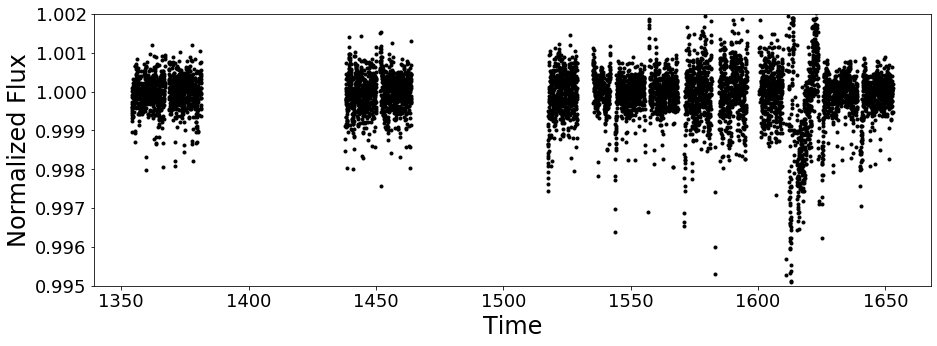

In [13]:
plt.figure(figsize=(15,5))
for i in range(len(star)):
    print(i)
    data0 = eleanor.TargetData(star[i], height=15, width=15, bkg_size=31, do_psf=False, do_pca=False)

    q0 = data0.quality == 0

    plt.plot(data0.time[q0], data0.corr_flux[q0]/np.median(data0.corr_flux[q0]), 'k.')
    
    np.savetxt('lc_%d.txt' % i, np.c_[data0.time[q0], data0.corr_flux[q0], data0.flux_err[q0]] )

plt.ylabel('Normalized Flux', fontsize=24)
plt.xlabel('Time', fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.ylim(0.995, 1.002)

plt.show()